In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding


In [2]:
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## Data Cleaning

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:

df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

df.dropna(inplace = True)

df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## Data Preprocessing


In [7]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [8]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14


In [10]:
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,14


In [11]:
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon


In [12]:
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,1


In [13]:
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

In [14]:
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan


In [15]:
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,2


In [17]:
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [18]:
df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed


In [19]:
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


## Data Exploration


In [20]:
df.describe()


,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


In [21]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [22]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


## Data Visualization

In [23]:
print(df['CATEGORY'].dtype)
print(type(df['CATEGORY']))
df['CATEGORY'] = df['CATEGORY'].astype('category')
print(df['CATEGORY'].dtype)
print(type(df['CATEGORY']))

object
<class 'pandas.core.series.Series'>
category
<class 'pandas.core.series.Series'>


In [24]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


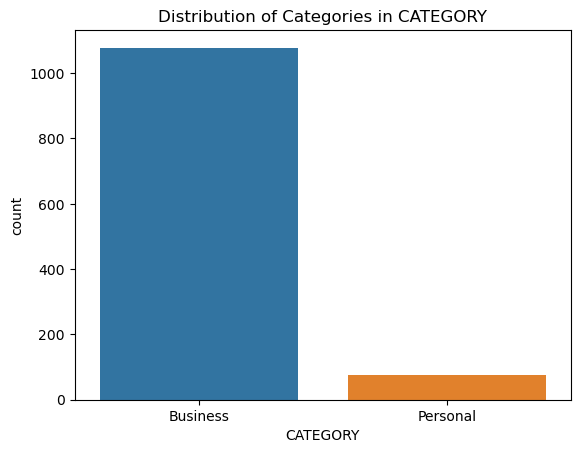

In [25]:
# Distribution of Categories in CATEGORY
sns.countplot(data=df, x='CATEGORY')
plt.title('Distribution of Categories in CATEGORY')
plt.show()

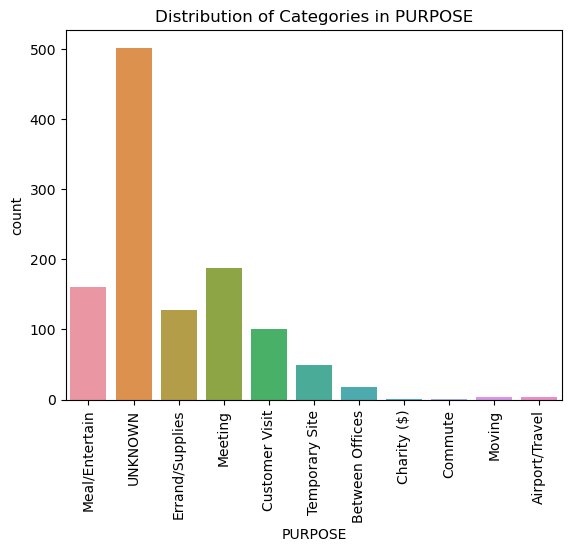

In [26]:
# Distribution of Categories in PURPOSE
sns.countplot(data=df, x='PURPOSE')
plt.title('Distribution of Categories in PURPOSE')
plt.xticks(rotation=90)
plt.show()

In [27]:
df["PURPOSE"].unique()

array(['Meal/Entertain', 'UNKNOWN', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

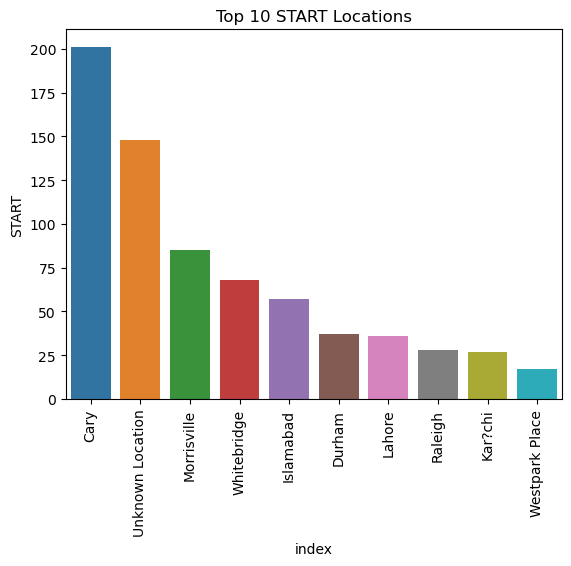

In [28]:
temp = df['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='START')
plt.title('Top 10 START Locations')
plt.xticks(rotation=90)
plt.show()

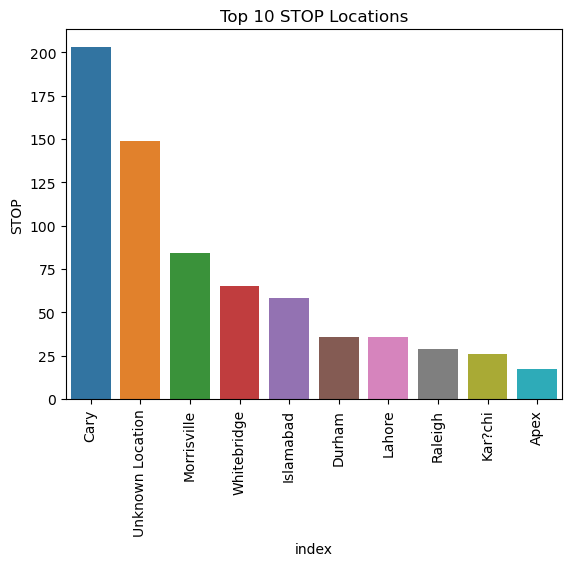

In [29]:
# Top 10 locations for STOP
temp = df['STOP'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='STOP')
plt.title('Top 10 STOP Locations')
plt.xticks(rotation=90)
plt.show()

In [30]:
print(df['TIME_OF_DAY'].dtype)
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')
print(df['TIME_OF_DAY'].dtype)

category
category


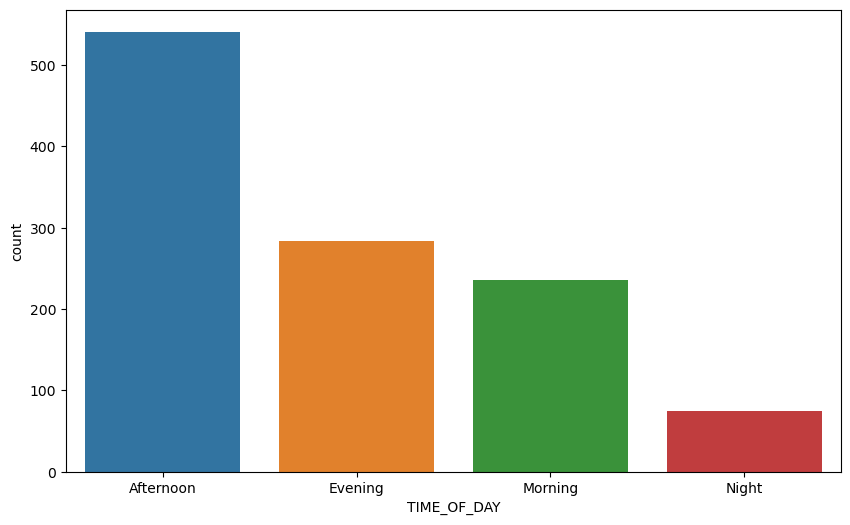

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()

In [32]:
print(df['MONTH_OF_THE_RIDE'].dtype)
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')
print(df['MONTH_OF_THE_RIDE'].dtype)

object
category


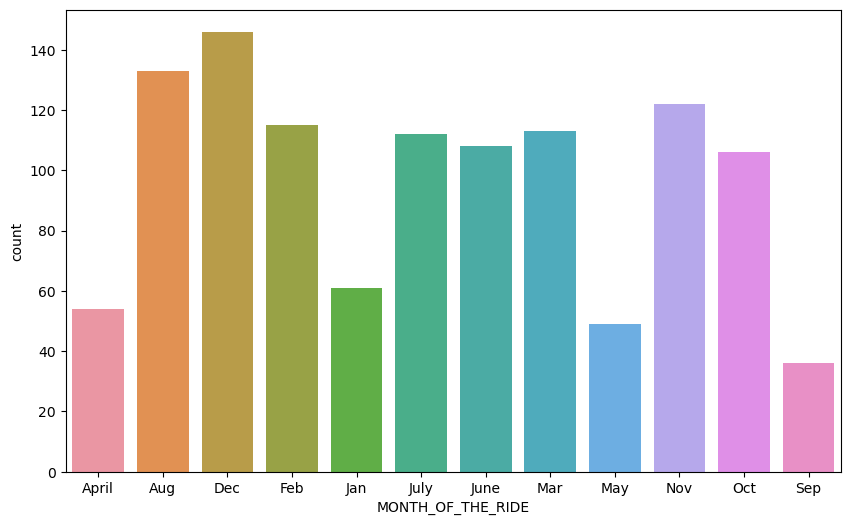

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')
plt.show()

In [34]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'TIME_DAY', 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE',
       'DAY_OF_THE_RIDE', 'DURATION_OF_THE_RIDE'],
      dtype='object')

In [35]:
df['MILES'].min()

0.5

In [36]:
df['MILES'].max()

310.3

In [37]:
df['PRICE'] = df['MILES'].apply(lambda i : i*11)

In [38]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE,PRICE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0,56.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0,55.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0,52.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0,51.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0,700.7


In [39]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'TIME_DAY', 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE',
       'DAY_OF_THE_RIDE', 'DURATION_OF_THE_RIDE', 'PRICE'],
      dtype='object')

In [40]:
df['PRICE'] = df['PRICE'].apply(lambda i : round(i) )

In [41]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE,PRICE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0,56
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0,55
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0,53
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0,52
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0,701


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X = df[['START', 'STOP']]  # Features
y = df['MILES']  # Target

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['START', 'STOP'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 7900489936921.63


In [ ]:
import nltk
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the Uber dataset
df = pd.read_csv('UberDataset.csv')

# Define the greeting message
GREETING_INPUTS = ["hello", "hi", "greetings", "sup", "what's up", "hey"]
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

# Define the start location options
df['START'] = df['START'].astype(str)
START_OPTIONS = list(df['START'].unique())

# Define the stop location options
df['STOP'] = df['STOP'].astype(str)
STOP_OPTIONS = list(df['STOP'].unique())

# Define a flag to track stop location selection
stop_location_selected = False

# Define the machine learning model
vectorizer = TfidfVectorizer()
df['START'] = df['START'].astype(str)
df['STOP'] = df['STOP'].astype(str)
vectors = vectorizer.fit_transform(df['START'] + ' ' + df['STOP'])
similarity_matrix = cosine_similarity(vectors)
slf = False
# Define the chatbot function
def chatbot_response(user_input):
    global stop_location_selected  # Use the global flag to track stop location selection
    response = ''
    
    sentence_tokens = nltk.sent_tokenize(user_input)
    for token in sentence_tokens:
        if token in GREETING_INPUTS:
            response = random.choice(GREETING_RESPONSES)
        elif 'book uber' in token:
            response = "Sure, would you like to book an Uber now?"
        elif 'yes' in token:
            response = f"Great! Here is a list of starting locations: {START_OPTIONS}. Please select a starting location."
        elif any(word in token for word in START_OPTIONS) and not slf:
            start_location = next((word for word in token.split() if word in START_OPTIONS), None)
            response = f"Got it! You selected {start_location} as your starting location. Please select a stop location."
            slf = True
        elif any(word in token for word in STOP_OPTIONS) and stop_location_selected:
            stop_location = next((word for word in token.split() if word in STOP_OPTIONS), None)
            start_location = df[df['START'] == start_location].iloc[0]['START']
            stop_location = df[df['STOP'] == stop_location].iloc[0]['STOP']
            distance = similarity_matrix[START_OPTIONS.index(start_location)][STOP_OPTIONS.index(stop_location)]
            price = round(distance * 1.5, 2)
            response = f"Got it! You selected {stop_location} as your stop location. The distance between {start_location} and {stop_location} is {distance} miles and the estimated price is ${price}."
        elif any(word in token for word in STOP_OPTIONS):
            stop_location = next((word for word in token.split() if word in STOP_OPTIONS), None)
            stop_location_selected = True  # Set the flag to indicate stop location selection
            response = f"Got it! You selected {stop_location} as your stop location. Please select a starting location."
        else:
            response = "I'm sorry, I didn't understand your input."
    return response

# Define the chat loop
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break
    response = chatbot_response(user_input)
    print("ChatBot:", response)